<a href="https://colab.research.google.com/github/asadalam1/play_store_app_analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing libraries and Mounting files


In [61]:
#Importing Various libraries to use 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [62]:
#Mounting Data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Reading csv files
file_dir='/content/drive/MyDrive/Temp Projects/Play Store App Review Analysis/'
play_store_app_df=pd.read_csv(file_dir +'Play Store Data.csv')
review_df=pd.read_csv(file_dir + 'User Reviews.csv')





#Cleaning  Play Store Data Set

---


In [64]:
#Creating a copy of our original data frames
df=play_store_app_df.copy()
rdf=review_df.copy()

In [65]:
#checking basic composition of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [66]:
#observing first 5 Rows of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
#checking if there is multiple data for the same app
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [68]:
#Removing Duplicate rows of our data frame on App column


df.drop_duplicates(subset=['App'],keep='first',inplace=True,ignore_index=True)


In [69]:
#rechecking our data for duplicates
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [70]:
#Checking the basic info of our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [71]:
#checking different types of values in the type column and its count
df['Type'].value_counts()
    


Free    8902
Paid     756
0          1
Name: Type, dtype: int64

In [72]:
#Cheking which row has the type as 0
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [73]:
#Removing the above gibbrish entry
df.drop(9300,axis=0,inplace=True)
df.reset_index(inplace=True)


In [74]:
#checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [75]:
#checking if there is any null value in the Type column
df[df['Type'].isna()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [76]:
#Since price is zero we have cross verified the app in the Play Store, it is found to be free , so we set NaN to Free 
df.loc[8028,'Type']='Free'
df.loc[8028]


index                                  8028
App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 8028, dtype: object

In [77]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [78]:
#Checking null values of 'Current Ver' and 'Android Ver' columns
df[df['Current Ver'].isna()]


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [79]:
#Setting the null values of columns 'Current Ver' and 'Android Ver' as 'Missing'
df['Current Ver'].fillna('Missing',inplace=True)
df['Android Ver'].fillna('Missing',inplace=True)

In [80]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [81]:
#Setting the null values of column 'Rating' with the average rating 
df.loc[df['Rating'].isna(),'Rating']= df.loc[~df['Rating'].isna(),'Rating'].mean()

In [82]:
#checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [83]:
#Creating a column named 'Price in $' whose entries are float value of price without $ sign

def price_without_dollar(price):
  '''Convert price in string with dollar to float without dollar sign'''
  price=price[1:]
  return float(price)


df['Price in $']=df.loc[df['Price']!='0','Price'].apply(lambda x: price_without_dollar(x))
df['Price in $'][df['Price in $'].isna()]=0.0


In [84]:
#observing the first two rows for the data of Free type apps
df[df['Type']=='Free'].head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [85]:
#observing the first two rows for the data of Paid type apps
df[df['Type']=='Paid'].head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
233,233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,4.99
234,234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,4.99


In [86]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
 14  Price in $      9659 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


In [87]:
#Changing the data type of Reviews column to int type 
df['Reviews']=df['Reviews'].astype(int)

In [88]:
#checking first five observation 
df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [89]:
#dropping the column named index
df.drop('index', axis=1, inplace=True)

In [90]:
#checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  Price in $      9659 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


#Cleaning User Reviews data frame. 

In [91]:
#observing the first five rows of the data frame
rdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [92]:
#checking the basic info of the data frame
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [93]:
#checking value count for each apps in the data frame
rdf['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [94]:
#Dropping the Translated_Review column as it is of least importance in our analysis
rdf.drop('Translated_Review', axis=1,inplace=True)

In [95]:
#Dropping the rows with null observation
rdf.dropna(inplace=True)
rdf.reset_index(inplace=True)

In [96]:
#checking the info of the data frame
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   37432 non-null  int64  
 1   App                     37432 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [97]:
#dropping the column named index 
rdf.drop('index',axis=1, inplace=True)

#Merging two data frame on App columns

In [98]:
#Merging two data frame
merged_df = df.merge(rdf, on="App")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35934 entries, 0 to 35933
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35934 non-null  object 
 1   Category                35934 non-null  object 
 2   Rating                  35934 non-null  float64
 3   Reviews                 35934 non-null  int64  
 4   Size                    35934 non-null  object 
 5   Installs                35934 non-null  object 
 6   Type                    35934 non-null  object 
 7   Price                   35934 non-null  object 
 8   Content Rating          35934 non-null  object 
 9   Genres                  35934 non-null  object 
 10  Last Updated            35934 non-null  object 
 11  Current Ver             35934 non-null  object 
 12  Android Ver             35934 non-null  object 
 13  Price in $              35934 non-null  float64
 14  Sentiment               35934 non-null

#Question1: What percentage of apps are paid and free.

In [99]:
#Checking the number of apps in Free and Paid type
app_type_df=df['Type'].value_counts()
app_type_df


Free    8903
Paid     756
Name: Type, dtype: int64

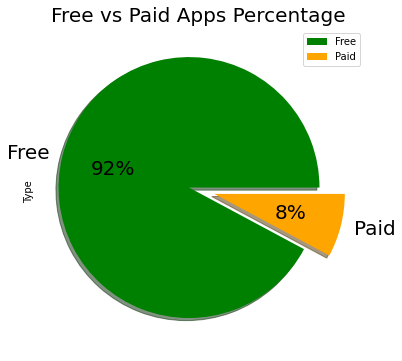

In [100]:
#Plotting pie chart of free vs paid apps

plt.rcParams['figure.figsize']=(6,6)
type_pie=app_type_df.plot(kind='pie',autopct='%1.0f%%',fontsize=20,shadow=True, colors=['green','orange'],explode=(0.10,0.10))
type_pie.set_title("Free vs Paid Apps Percentage ",fontsize=20)
plt.legend()

Here we can see that most of the apps (92%) are free and only 8% of apps are paid.

#Question2: Count of apps in each category:


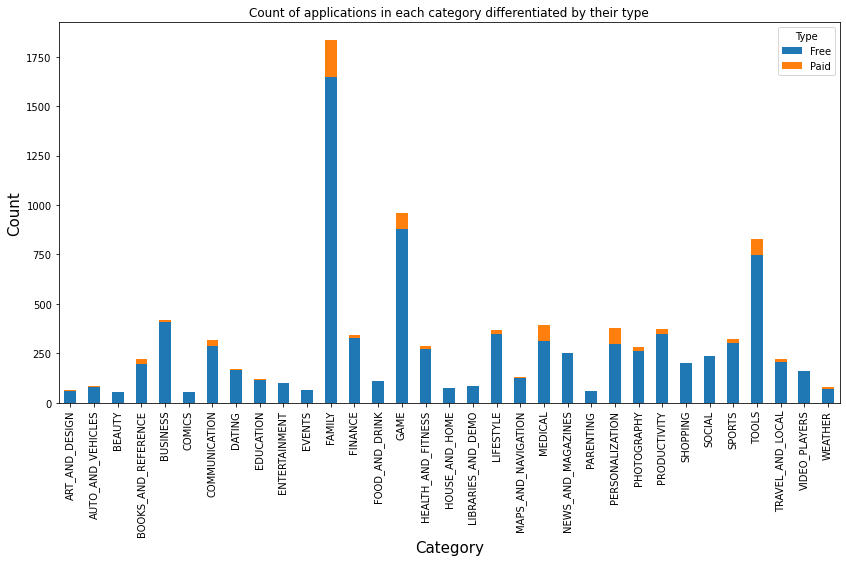

In [101]:
#plotting the bar graph 
#Creating the app count data frame
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games, Tools and Business are Free. At the same time Family, Medical, Games, Personalization and Tools had the most number of paid apps available for download.

In [102]:
#Plotting bar graph for category wise app count
x=df['Category'].value_counts()
y=df['Category'].value_counts().index
print(x)
print(y)


FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', '

Text(0.5, 1.0, 'Category Wise Count of Apps on Google Playstore')

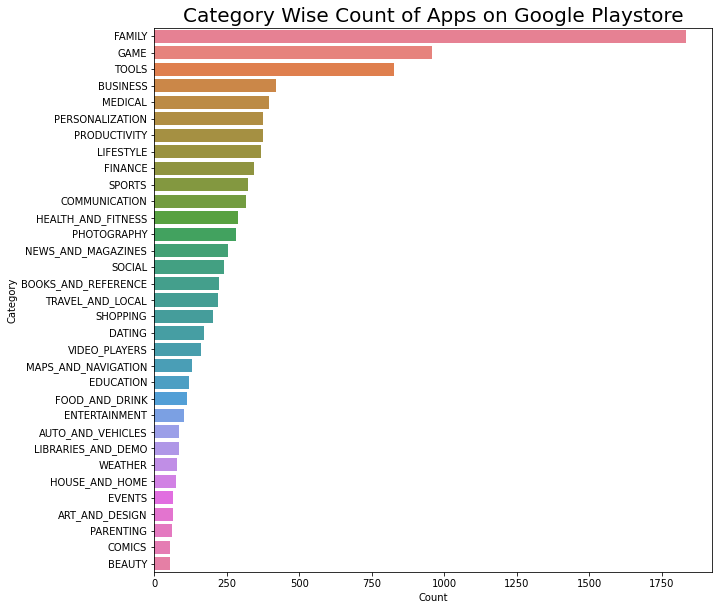

In [103]:
#Plotting the graph
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Category Wise Count of Apps on Google Playstore", fontsize = 20)

In [104]:
#For Free Apps
#We create a new dataframe which contains data of only free apps
free_apps_df=df[df['Type']=='Free']
free_apps_df.shape


(8903, 14)

In [105]:
#For Paid Apps
#We create a new dataframe which contains data of only paid apps
paid_apps_df=df[df['Type']=='Paid']
paid_apps_df.shape

(756, 14)

#Question 3: Average Rating of Free and paid apps.


We plotted the probablity distribution graph for ratings of Free and Paid apps.


In [106]:
#For Free Apps
free_apps_df['Rating'].mean()


4.167384211221347

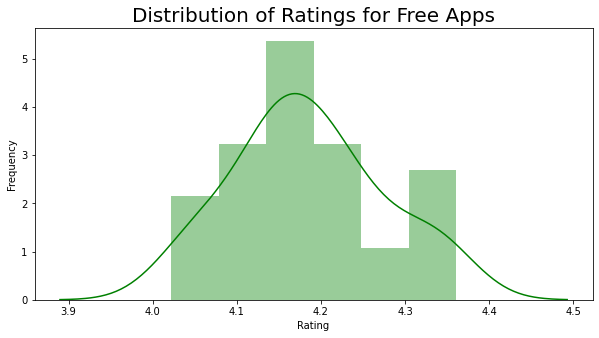

In [107]:
#Creating free app rating data frame
free_app_ratings_df = free_apps_df.groupby(['Category'])[['Rating']].mean()

#plotting the distribution graph
plt.figure(figsize=(10,5))
g = sns.distplot(free_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Free Apps',size = 20)
plt.show()

In [108]:
#For paid apps
paid_apps_df['Rating'].mean()


4.242239342458961

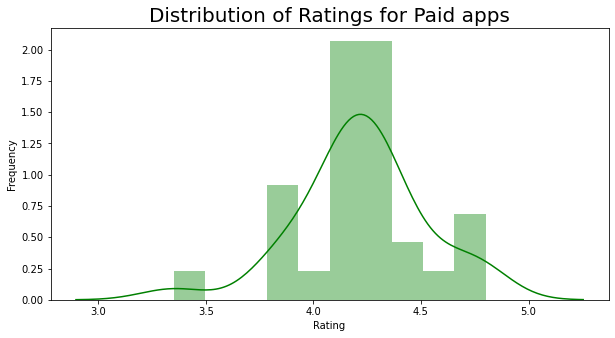

In [109]:
#Creating paid app rating data frame
paid_app_ratings_df = paid_apps_df.groupby(['Category'])[['Rating']].mean()

#plotting the distribution graph
plt.figure(figsize=(10,5))
g = sns.distplot(paid_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Paid apps',size = 20)
plt.show()

Here we can see that the average ratings of free apps as approx 4.1 out of 5 and for paid apps it is approx 4.2 out of 5. Thus we can conclude that paid apps are slightly better rated as compared to free apps.

#Question 4: Comparing no. of Installs and no. of apps available in Play Store by its Content Rating

In [110]:
#Checking the number of apps in free apps dataframe as per its content
free_apps_df['Content Rating'].value_counts()


Everyone           7248
Teen                984
Mature 17+          375
Everyone 10+        291
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of Free Apps on Google Playstore')

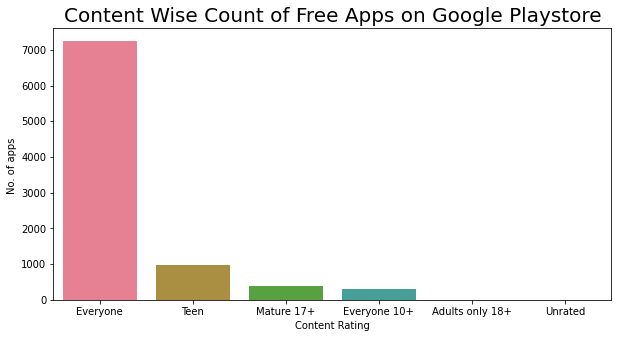

In [111]:
#Plotting the bar plot 
y=free_apps_df['Content Rating'].value_counts()             #It gives series
x=free_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of Free Apps on Google Playstore", fontsize = 20)

In [112]:
#Checking the number of apps in paid apps dataframe as per its content
paid_apps_df['Content Rating'].value_counts()

Everyone        655
Teen             52
Everyone 10+     31
Mature 17+       18
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of paid Apps on Google Playstore')

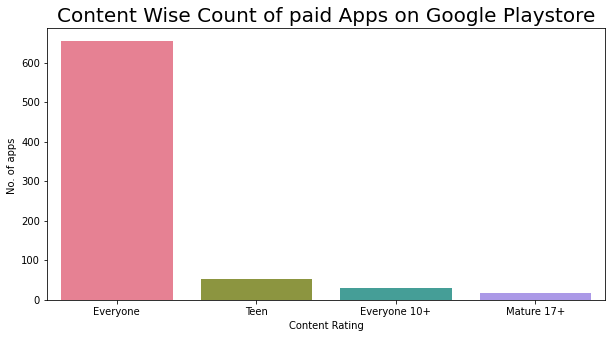

In [113]:
#Plotting the bar plot 
y=paid_apps_df['Content Rating'].value_counts()             #It gives series
x=paid_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of paid Apps on Google Playstore", fontsize = 20)

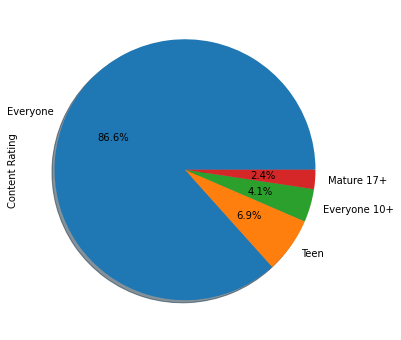

In [114]:
#Plotting pie chart for Content Rating based on no of apps availabe
y.plot(kind='pie', autopct='%0.01f%%',shadow=True)

In [115]:
#Removing '+' from the values of number of installs and converting it to numeric

df['Installs'] = df['Installs'].apply(lambda x: x.rstrip('+'))
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))

In [116]:
#checking the first 5 rowsof our data frame to varify the changes
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [117]:
#checking the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  Price in $      9659 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


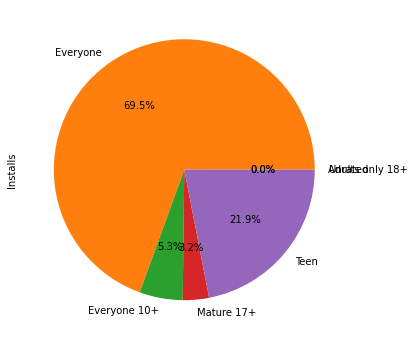

In [118]:
#Plotting pie chart for Content Rating based on no. of installations of apps

content_df=df.groupby('Content Rating')['Installs'].sum()

content_df.plot(kind='pie',autopct='%0.01f%%')



There are mojority of apps available for Everyone followed by 10.7% of apps for Teens , 4% for Mature 17+ and 3.3% for 10+.

And there are very few apps available for Adults 18+ and Unrated.

We can notice that there are only 10.7% apps available for Teens but it accounts for 21% of total app installs, hence it is evident that demand of apps for Teens is very high.

#Question 5 : Which are the Ctegories that are getting installed the most

In [119]:
#For No of apps Available to Download in Each category
x=df['Category'].value_counts()
y=df['Category'].value_counts().index
print(x)
print(y)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', '

Text(0.5, 1.0, 'Category Wise Count of Apps on Google Playstore')

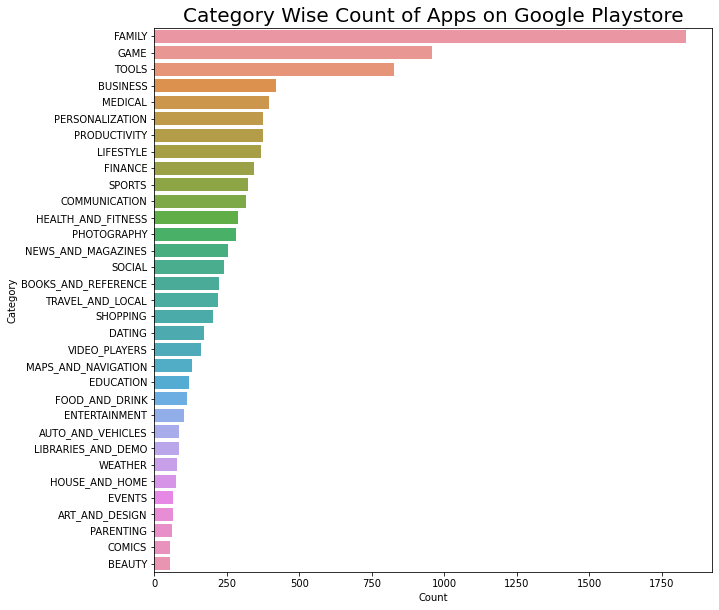

In [120]:
#plotting the graph for category wise count of apps 
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")


graph = sns.barplot(x = xsis, y = ysis)
graph.set_title("Category Wise Count of Apps on Google Playstore", fontsize = 20)

In [121]:
#Which are the Ctegories that are getting installed the most
top_category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = df.groupby(['Category'])[['Installs']].sum()
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs



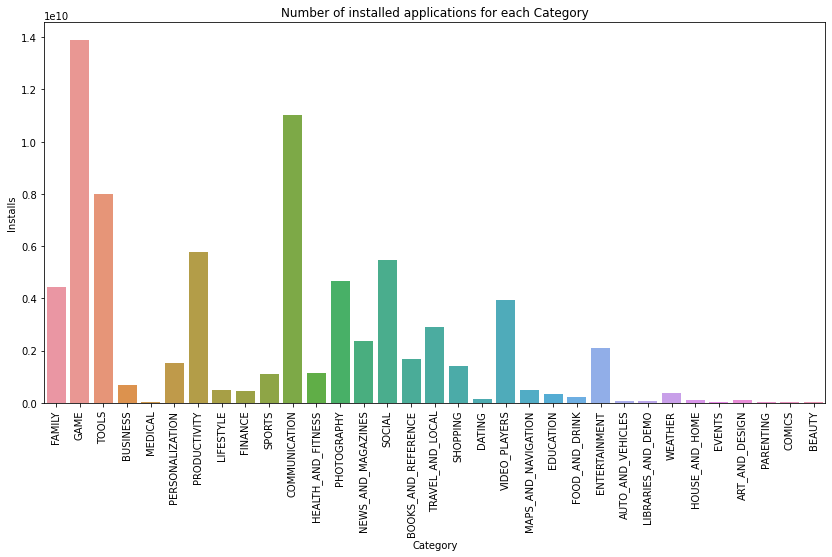

In [122]:
#plotting the graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()
#1e10=10^10 (Ten Raised to the power 10)

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games, Tools, and Business but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communicatin, Tools and productivity.

Here we can also see that no of apps available in Communication and Social category is very less as compared to to user demands as its installs are very high.

#Question 6 : How does size impact the number of installs of any application

In [123]:
# Converting KB to MB 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [124]:
#checking the info of our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  Price in $      9659 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.0+ MB


In [125]:
#Viewing the first two rows of our data frame to varify the changes
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [126]:
#Checking the minimum and the maximum no of downloads 
df['Installs'].min(),df['Installs'].max()

(0, 1000000000)

As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs.

In [127]:
#Adding new column 'log_installs' to our data frame
df['log_installs'] = np.log10(df['Installs'])

#Grouping the data on category and type and taking sum of installs
categoty_type_installs =df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [128]:
#taking log of installs in the grouped data
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

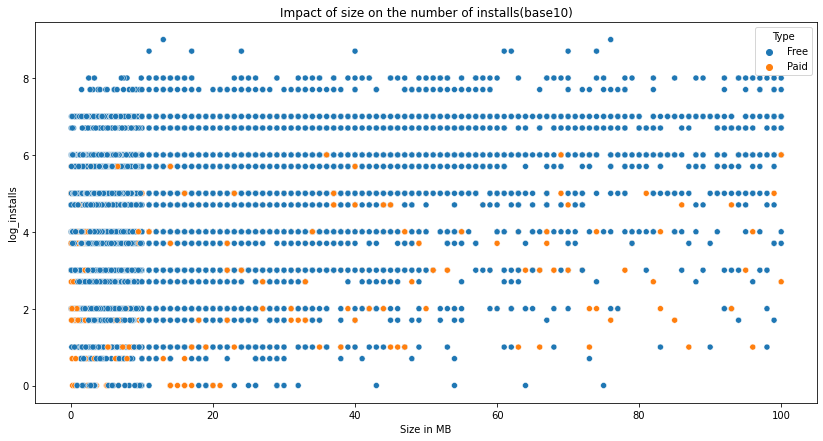

In [129]:
#Plotting the graph
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(df['Size'], df['log_installs'], hue=df['Type'])
plt.xlabel("Size in MB")
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.


#Histogram (number of apps vs its size in the Playstore)

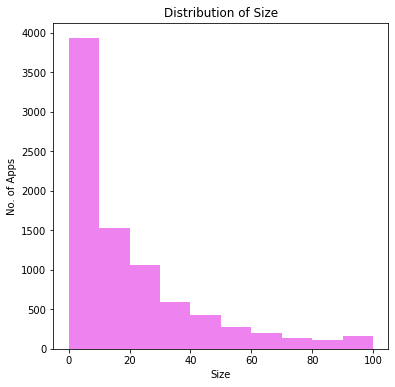

In [130]:
#Plotting the histogram
plt.xlabel("Size")
plt.ylabel("No. of Apps")
plt.title("Distribution of Size")
plt.hist(df['Size'],color='violet');
plt.show()

#Question 7: Top Revenue generated by Paid apps depending on its category

In [131]:
#Removing '+' from the values of number of installs and converting it to numeric

paid_apps_df['Installs'] = paid_apps_df['Installs'].apply(lambda x: x.rstrip('+'))
paid_apps_df['Installs'] = pd.to_numeric(paid_apps_df['Installs'].str.replace(',',''))

In [132]:
#Creating a column named revenue for paid apps 
paid_apps_df['Revenue']=paid_apps_df['Price in $']*paid_apps_df['Installs']

In [133]:
#Taking group of paid apps data frame on category with mean of Revenue
paid_apps_df.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

Category
LIFESTYLE              3.030734e+06
FINANCE                1.513334e+06
FAMILY                 6.212013e+05
EDUCATION              6.009950e+05
WEATHER                5.226725e+05
GAME                   4.962029e+05
PHOTOGRAPHY            4.498825e+05
ENTERTAINMENT          3.990000e+05
MAPS_AND_NAVIGATION    2.481578e+05
SPORTS                 1.960922e+05
COMMUNICATION          1.573098e+05
PRODUCTIVITY           1.540491e+05
FOOD_AND_DRINK         1.422000e+05
PARENTING              1.249795e+05
TRAVEL_AND_LOCAL       9.595870e+04
HEALTH_AND_FITNESS     9.507126e+04
BUSINESS               8.754527e+04
PERSONALIZATION        8.391293e+04
VIDEO_PLAYERS          8.382250e+04
MEDICAL                7.177754e+04
TOOLS                  7.006180e+04
AUTO_AND_VEHICLES      3.338283e+04
SHOPPING               1.507450e+04
ART_AND_DESIGN         1.061333e+04
DATING                 8.076917e+03
NEWS_AND_MAGAZINES     3.222500e+03
BOOKS_AND_REFERENCE    3.222384e+03
SOCIAL             

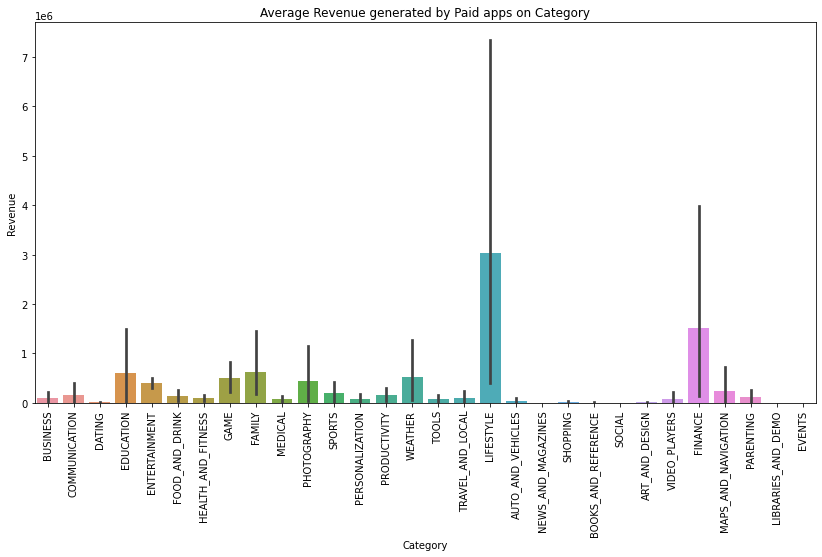

In [134]:
#Plotting the bar graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Revenue")   #in million 1e6
plt.title("Average Revenue generated by Paid apps on Category")
sns.barplot(paid_apps_df.Category, paid_apps_df.Revenue)
plt.show()

Here we can see that Lifestyle Category has generated the highest average revenue followed by Finance, Family and Education. 

Top 10 apps generating highest revenue

In [149]:
#Creating data frame for top 10 apps
top_10_apps=paid_apps_df[['App','Category','Revenue','Installs']].sort_values('Revenue', ascending=False).head(10)
top_10_apps

,App,Category,Revenue,Installs
1743,Minecraft,FAMILY,69900000.0,10000000
4396,I am rich,LIFESTYLE,39999000.0,100000
4400,I Am Rich Premium,FINANCE,19999500.0,50000
3208,Hitman Sniper,GAME,9900000.0,10000000
6370,Grand Theft Auto: San Andreas,GAME,6990000.0,1000000
2260,Facetune - For Free,PHOTOGRAPHY,5990000.0,1000000
4607,Sleep as Android Unlock,LIFESTYLE,5990000.0,1000000
7687,DraStic DS Emulator,GAME,4990000.0,1000000
3469,I'm Rich - Trump Edition,LIFESTYLE,4000000.0,10000
4398,I am Rich Plus,FAMILY,3999900.0,10000


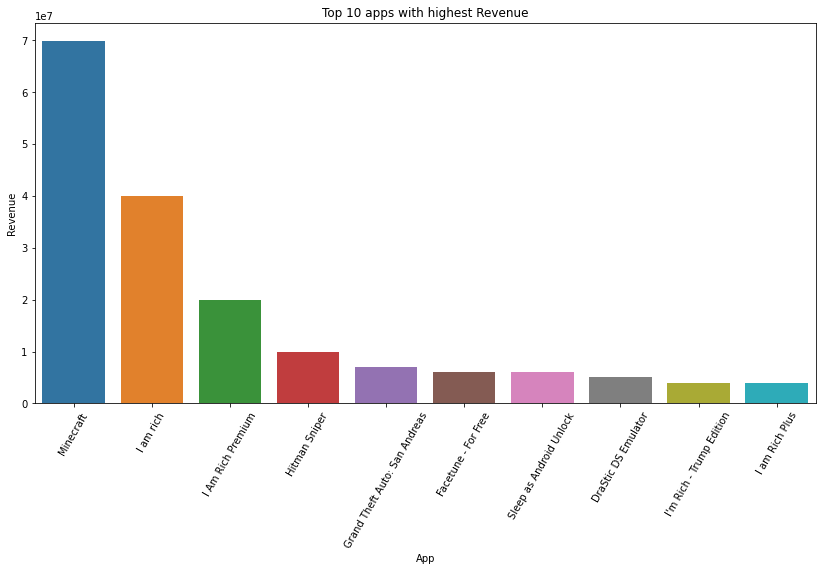

In [136]:
#plotting the bar chart for top 10 apps
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Apps")
plt.ylabel("Revenue")   #in Ten million 1e7
plt.title("Top 10 apps with highest Revenue")
sns.barplot(top_10_apps.App, top_10_apps.Revenue)
plt.show()

These are the top 10 apps which have generated the highest revenue .

#Question 8 : Drawing Correlation Heatmap 

In [137]:
#Creating A correlation Data Frame on selected Columns 
corr_df=df[['Price in $','Installs','Size','Reviews','Rating']]
corr_df=corr_df.corr()
corr_df


,Price in $,Installs,Size,Reviews,Rating
Price in $,1.000000,-0.009405,-0.022441,-0.007598,-0.019534
Installs,-0.009405,1.000000,0.134291,0.625165,0.040068
Size,-0.022441,0.134291,1.000000,0.179321,0.058661
Reviews,-0.007598,0.625165,0.179321,1.000000,0.055012
Rating,-0.019534,0.040068,0.058661,0.055012,1.000000


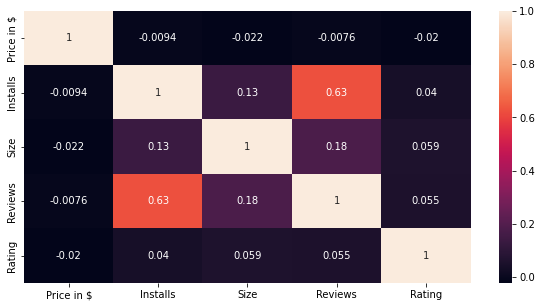

In [138]:
#Plotting the Correlatin Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,annot=True)

We can see that there is a strong positive correlation between Reviews and Installs, More the app is being installed the more it will be reviewed.

Also there is light positive correlation between Installs and Size, As People tend to install  apps which consumes less memory in their device.

Price is slightly negatively correated with Rating, Review, Size and Installs.

Rating is slightly positively correlated with Installs, Size and Reviews.

#Question 9: Distribution of type of reviews in the dataset

Percentage of Review Sentimets:

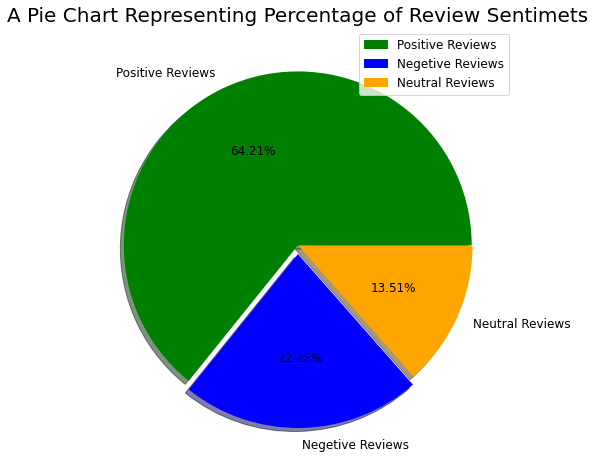

In [148]:
#creating pie chart for percentage of review sentiments
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%", colors=['green','blue','orange'])
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)

plt.legend()
plt.show()

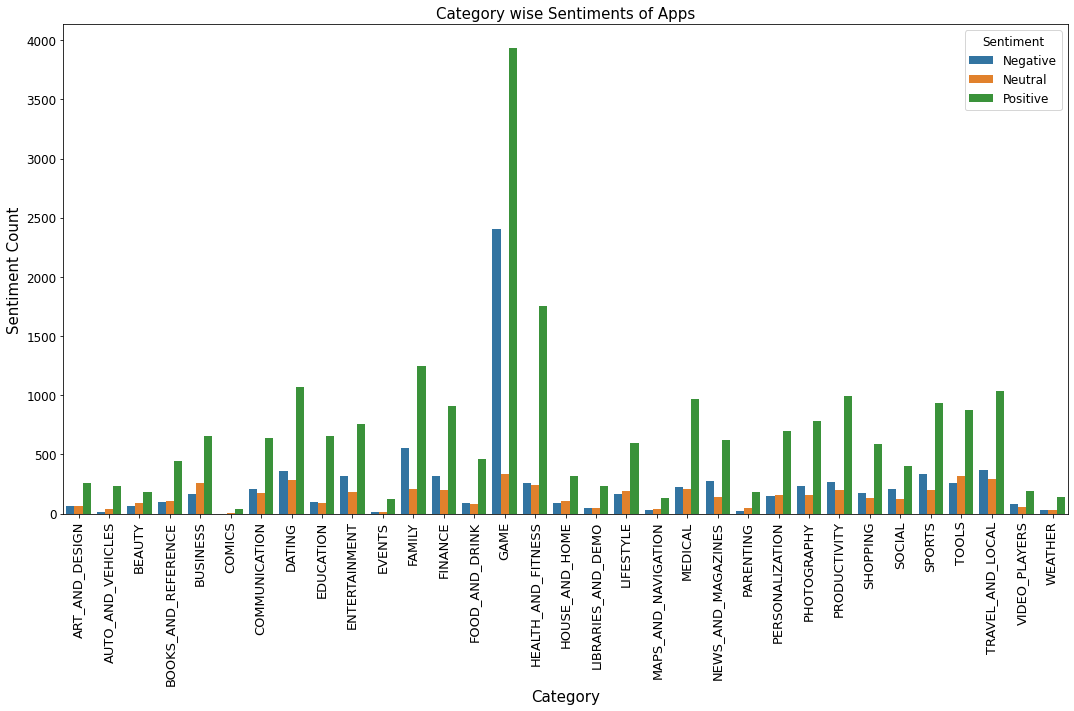

In [146]:
#Category wise Sentiments of apps
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

#Plotting the bar graph
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=13)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Category wise Sentiments of Apps",fontsize=15)
sns.barplot('Category', 'Sentiment Count', hue='Sentiment', data=category_sentiment)

Majority of the apps (64.2%) in the Play Store is Positively Reviewed and 22.2% are Negatively Reviewed and the rest 13.5% are Neutral Reviewed.

Looking Category wise Games has both highest Positive Review and Negative Review at the same time.

#Question 10 : Analysing Sentiment_Polarity and Sentiment_Subjectivity

In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

Histogram of subjectivity

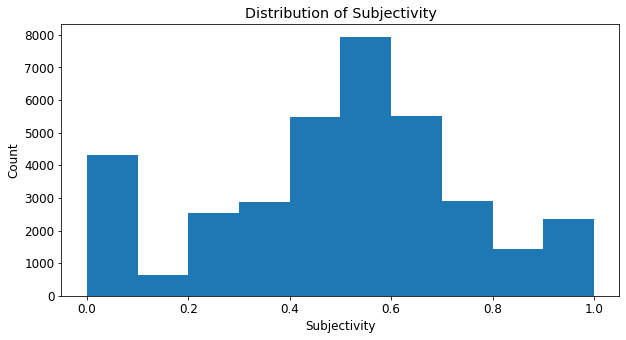

In [141]:
#Plotting the Histogram for distribution of subjectivity
plt.figure(figsize=(10,5))
plt.xlabel("Subjectivity")
plt.ylabel("Count")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience and is not factual.

In [142]:
#Creating the data frame for sentiment polarity and sentiment subjectivity
senti_pol_and_sub_corr=merged_df[['Sentiment_Polarity','Sentiment_Subjectivity']]

#Creating correlation
senti_pol_and_sub_corr=senti_pol_and_sub_corr.corr()

senti_pol_and_sub_corr

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.259734
Sentiment_Subjectivity,0.259734,1.000000


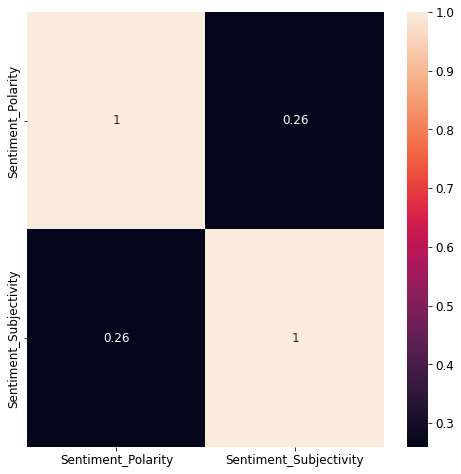

In [143]:
#Drawing Heatmap
sns.heatmap(senti_pol_and_sub_corr, annot=True)

From the above Heatmap it can be concluded that sentiment subjectivity is not always correlated to sentiment polarity .